# Algerian Forest Fire Dataset
The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region. 

The period from June 2012 to September 2012. 
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fired (138 classes) and not Fired (106 classes) classes.



1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8
FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely  fired and not fired

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [10]:
dataset = pd.read_csv('./Algerian_Forest_Fire_Cleaned_Dataset.csv')

In [11]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int64  
 1   month        241 non-null    int64  
 2   year         241 non-null    int64  
 3   Temperature  241 non-null    int64  
 4   RH           241 non-null    int64  
 5   Ws           241 non-null    int64  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  region       241 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.4+ KB


# Data Cleaning

In [5]:
# handling missing value
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [6]:
dataset[dataset.isnull().any(axis=1)]   # checking by another way 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region


In [7]:
## Our dataset is in both dataset  
## till 122 , it is of bajai region 
## and after this , it is of siddi-bell region 

In [8]:
## add region column
# we label bajai as 0 
# # we label siddibell as 1 
dataset.loc[:122,"region"] = 0 
dataset.loc[122:,"region"] = 1
df=dataset 
df.loc[:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,0
122,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
123,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
124,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [10]:
df[['region']] = df[['region']].astype(int)

In [11]:
df[['region']].head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   region  5 non-null      int32
dtypes: int32(1)
memory usage: 148.0 bytes


In [12]:
## removing null values 
df = df.dropna().reset_index(drop=True)

In [13]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [14]:
df.iloc[[122]]  

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [15]:
## here we can see that 122 row is un neccessary , so we have to remove it
df = df.drop(122).reset_index(drop=True)

In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1


In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [18]:
## fix spaces in column name 
df.columns = df.columns.str.strip()   ## strip() = remove white spaces
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [19]:
##change the required columns as interger Datatype
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int32  
 1   month        241 non-null    int32  
 2   year         241 non-null    int32  
 3   Temperature  241 non-null    int32  
 4   RH           241 non-null    int32  
 5   Ws           241 non-null    int32  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  region       241 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.8+ KB


In [20]:
## changing the other columns as float datatype
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int32  
 1   month        241 non-null    int32  
 2   year         241 non-null    int32  
 3   Temperature  241 non-null    int32  
 4   RH           241 non-null    int32  
 5   Ws           241 non-null    int32  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  region       241 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.8+ KB


In [22]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,241.000000,241.000000,241.0,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,15.879668,7.514523,2012.0,32.161826,61.958506,15.518672,0.749793,78.020332,14.780913,49.774689,4.776763,16.805394,7.092116,0.493776
std,8.782442,1.110929,0.0,3.640449,14.861525,2.809334,2.000607,14.274480,12.395199,47.712892,4.154190,14.231143,7.445187,0.501002
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.600000,5.800000,14.700000,1.400000,6.100000,0.800000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.300000,33.400000,3.500000,12.500000,4.700000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,74.000000,17.000000,0.500000,88.300000,20.900000,71.000000,7.300000,22.900000,11.600000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [23]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [24]:
## saved our cleaned dataset 
df.to_csv('./Algerian_Forest_Fire_Cleaned_Dataset.csv',index=False)

## EDA - Exploratory Data Analysis

In [25]:
df_copy = df

In [26]:
## day , month , year is not required 
df_copy = df.drop(['day','month','year'], axis=1)

In [27]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [28]:
## Do the Encoding of the categories in classes 
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [29]:
## categories in classes
df_copy['Classes'].value_counts()

Classes
1    137
0    104
Name: count, dtype: int64

In [30]:
## here our classes is also a int 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  241 non-null    int32  
 1   RH           241 non-null    int32  
 2   Ws           241 non-null    int32  
 3   Rain         241 non-null    float64
 4   FFMC         241 non-null    float64
 5   DMC          241 non-null    float64
 6   DC           241 non-null    float64
 7   ISI          241 non-null    float64
 8   BUI          241 non-null    float64
 9   FWI          241 non-null    float64
 10  Classes      241 non-null    int32  
 11  region       241 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 18.0 KB


# Visualization

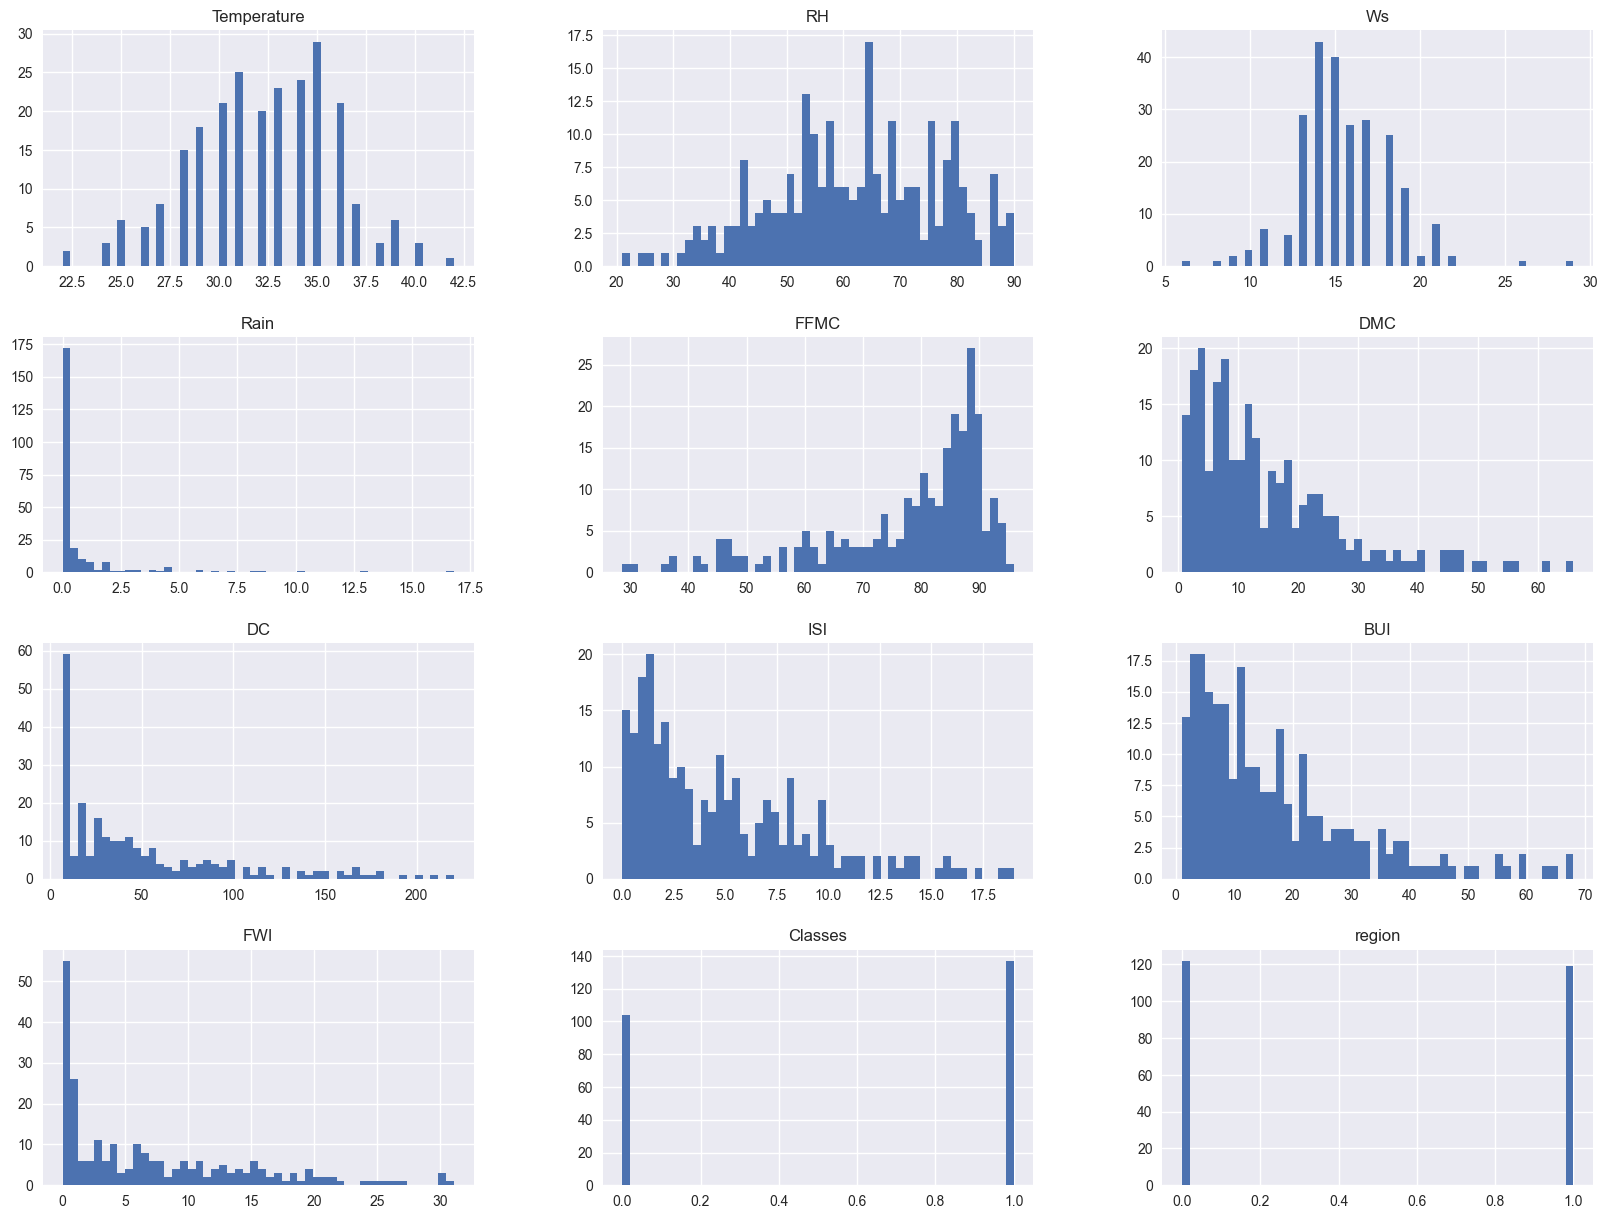

In [31]:
plt.style.use('seaborn-v0_8')  # For newer versions of matplotlib
df_copy.hist(bins=50,figsize=(20,15))          ## bin size(breadth of the beams ) = 50
plt.show()

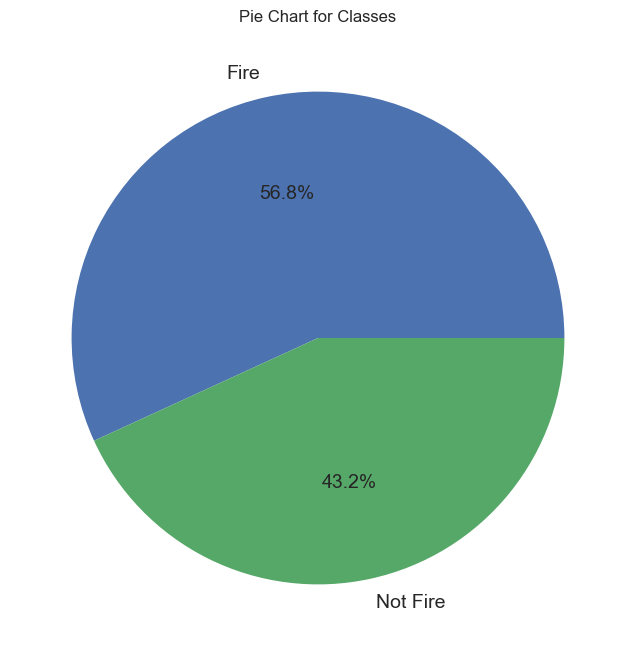

In [32]:
## Percentage and pie chart 
percentage = df_copy['Classes'].value_counts(normalize=True)*100  # Give percentages

# ploting a pie chart
classlabels = ['Fire' , 'Not Fire']
plt.figure(figsize=(12,8))
plt.pie(percentage , labels=classlabels,autopct='%1.1f%%',textprops={'fontsize' : '14'})
plt.title('Pie Chart for Classes')
plt.show()

In [33]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651184,-0.288538,-0.324519,0.679353,0.485406,0.375432,0.604182,0.459374,0.566649,0.516166,0.273554
RH,-0.651184,1.000000,0.251609,0.219067,-0.643718,-0.405444,-0.223201,-0.685228,-0.350446,-0.578951,-0.428928,-0.410789
Ws,-0.288538,0.251609,1.000000,0.179167,-0.182322,-0.009466,0.072004,-0.000320,0.023004,0.024420,-0.080857,-0.173839
Rain,-0.324519,0.219067,0.179167,1.000000,-0.541693,-0.285066,-0.294782,-0.344192,-0.296227,-0.321227,-0.375657,-0.047080
FFMC,0.679353,-0.643718,-0.182322,-0.541693,1.000000,0.599438,0.502847,0.737525,0.587699,0.688538,0.766622,0.237933
DMC,0.485406,-0.405444,-0.009466,-0.285066,0.599438,1.000000,0.875084,0.677847,0.982107,0.874943,0.581867,0.201872
DC,0.375432,-0.223201,0.072004,-0.294782,0.502847,0.875084,1.000000,0.505104,0.941620,0.737783,0.507224,-0.072004
ISI,0.604182,-0.685228,-0.000320,-0.344192,0.737525,0.677847,0.505104,1.000000,0.641194,0.922326,0.732736,0.273803
BUI,0.459374,-0.350446,0.023004,-0.296227,0.587699,0.982107,0.941620,0.641194,1.000000,0.856918,0.582868,0.098330
FWI,0.566649,-0.578951,0.024420,-0.321227,0.688538,0.874943,0.737783,0.922326,0.856918,1.000000,0.716898,0.206362


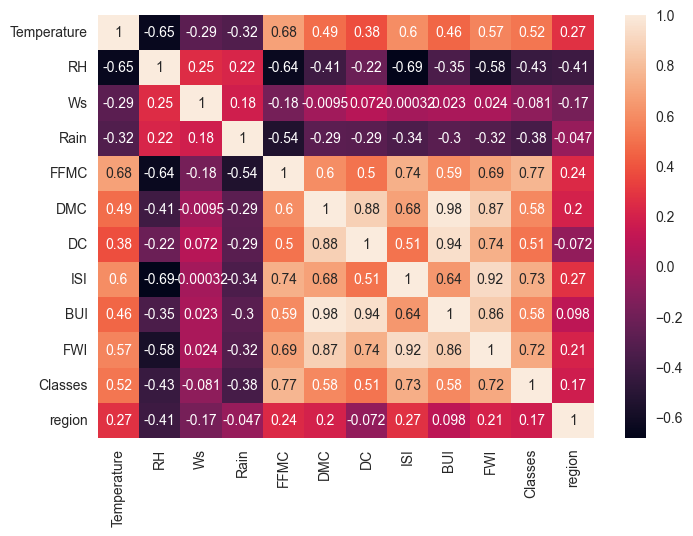

In [34]:
## heat map
sns.heatmap(df_copy.corr(),annot=True)
plt.show()

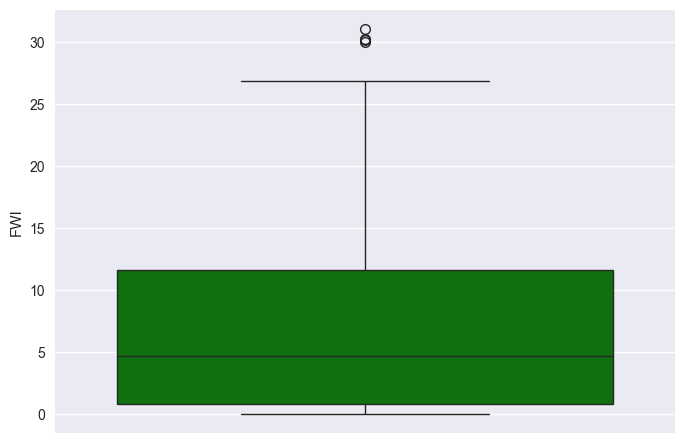

In [35]:
## box plot 
sns.boxplot(df_copy['FWI'] , color='green')
plt.show()          ## we can see some outliers

In [36]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

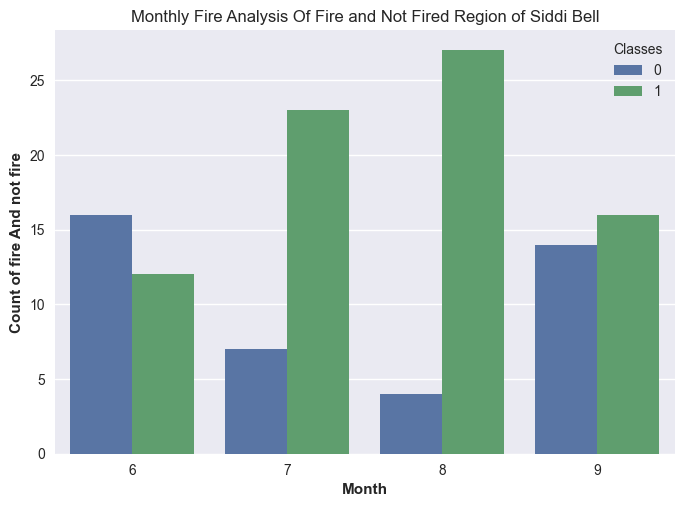

In [37]:
## For Siddi bell Region
dftemp = df.loc[df['region']==1]
plt.subplots()
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.xlabel('Month',weight='bold')
plt.ylabel('Count of fire And not fire',weight='bold')
plt.title('Monthly Fire Analysis Of Fire and Not Fired Region of Siddi Bell')
plt.show()

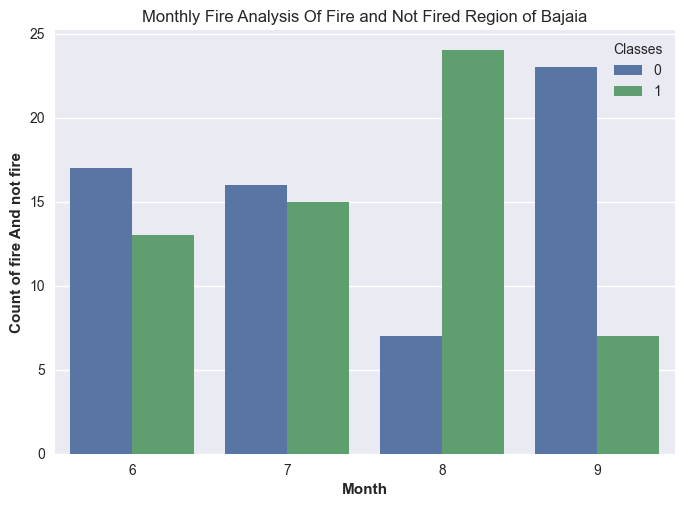

In [38]:
## For Bajaia Region
dftemp = df.loc[df['region']==0]
plt.subplots()
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.xlabel('Month',weight='bold')
plt.ylabel('Count of fire And not fire',weight='bold')
plt.title('Monthly Fire Analysis Of Fire and Not Fired Region of Bajaia')
plt.show()